In [5]:
#  Change the current working directory so that Python can directly access the local utility modules in this folder
%cd /content/drive/MyDrive/Colab\ Notebooks/Machine_Learning_Algorithms/Supervised_Algorithms

/content/drive/MyDrive/Colab Notebooks/Machine_Learning_Algorithms/Supervised_Algorithms


In [6]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [ ]:
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [ ]:
# Cost Function J(w,b)
def compute_cost(x, y, w, b):
  m=x.shape[0]
  cost=0

  for i in range(m):
    f_wb = w*x[i]+b
    cost += (f_wb -y[i])**2
  total_cost = 1/(2*m)*cost
  return total_cost


# **Cost Function**  

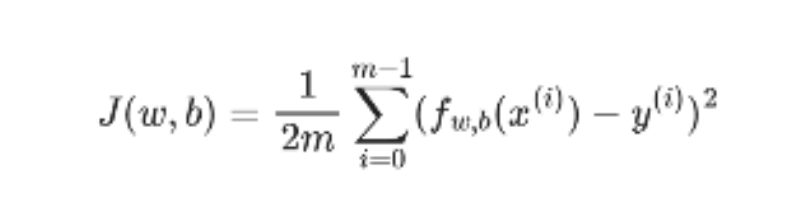

In [ ]:
def compute_gradient(x,y,w,b):
  m=x.shape[0]
  dj_dw=0
  dj_db=0

# computing the derivates that we will update parameters:(w,b) with
  for i in range(m):
    f_wb = w * x[i] + b
    dj_dw_i = (f_wb - y[i]) * x[i]
    dj_db_i = (f_wb - y[i])
    dj_dw += dj_dw_i
    dj_db += dj_db_i

  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw,dj_db



# **Gradiant Decsent**

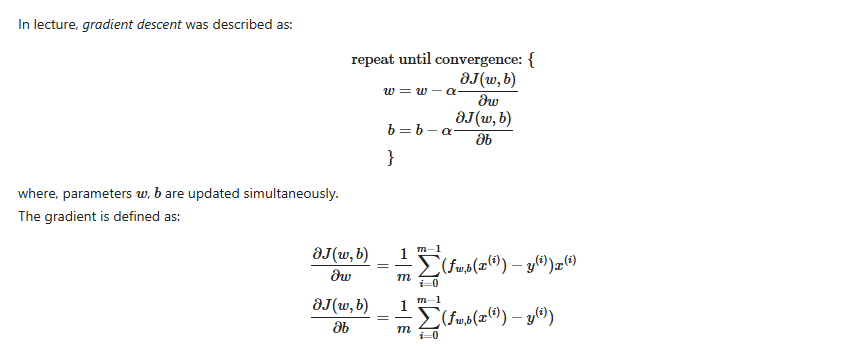

In [ ]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x (ndarray (m,))  : Data, m examples
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b]
    """

    w = copy.deepcopy(w_in)   # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history=[]
    p_history=[]
    b=b_in
    w=w_in

    for i in range(num_iters):
      # Calculate the gradient and update the parameters using gradient_function
      dj_dw,dj_db= gradient_function(x,y,w,b)

      b = b - alpha * dj_db
      w = w - alpha * dj_dw


      if i<100000:      # prevent resource exhaustion
        J_history.append(cost_function(x,y,w,b))
        p_history.append([w,b])

      # Print cost every at intervals 10 times or as many iterations if < 10
      if i % math.ceil(num_iters/10)==0:
        print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
              f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
              f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w,b,J_history,p_history  #return w and J,w history for graphing


In [4]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

NameError: name 'gradient_descent' is not defined

In [ ]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

In [ ]:
def predict_prices(sqft):
  return (w_final * (sqft/1000)) + b_final

In [ ]:
print(f"1000 sqft house prediction {predict_prices(1000):0.1f} Thousand dollars")
print(f"1200 sqft house prediction {predict_prices(1200):0.1f} Thousand dollars")
print(f"2000 sqft house prediction {predict_prices(2000):0.1f} Thousand dollars")

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

In [ ]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)

In [ ]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()

# **Congratulations!**
In this lab you:






*   delved into the details of gradient descent for a single variable.
*   developed a routine to compute the gradient
*   visualized what the gradient is
*   completed a gradient descent routine
*   utilized gradient descent to find parameters
*   examined the impact of sizing the learning rate





